In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer


In [86]:
df_up = pd.read_csv("C:/Users/maria/Desktop/Segundo_periodo/ING_CARACT/data_proyecto2.csv")
df_up

,nombre,Fecha,data
0,x1,01/01/2006,6.05
1,x1,02/01/2006,4.72
2,x1,03/01/2006,4.46
3,x1,04/01/2006,34.74
4,x1,05/01/2006,1.91
...,...,...,...
6566,x2,27/12/2014,-13.30
6567,x2,28/12/2014,16.20
6568,x2,29/12/2014,5.10
6569,x2,30/12/2014,4.90


In [87]:
df = df_up.pivot( index= "Fecha", columns="nombre", values = "data").reset_index()
df.columns.name = None
df

,Fecha,x1,x2
0,01/01/2006,6.05,9.22
1,01/01/2007,7.72,5.12
2,01/01/2008,1.29,2.50
3,01/01/2009,11.30,10.70
4,01/01/2010,6.40,3.40
...,...,...,...
3282,31/12/2010,15.21,9.00
3283,31/12/2011,14.15,NaN
3284,31/12/2012,1.72,NaN
3285,31/12/2013,0.92,8.40


In [88]:
print(f"Sesgo de x1 = {df['x1'].skew()}")
print(f"Kurtosis de x1 = {df['x1'].kurt()}")
print(f"Sesgo de x2 = {df['x2'].skew()}")
print(f"Kurtosis de x2 = {df['x2'].kurt()}")

Sesgo de x1 = 2.329477749561767
Kurtosis de x1 = 7.402126244451516
Sesgo de x2 = 2.3204673702385916
Kurtosis de x2 = 8.65277617471737


array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>]],
      dtype=object)

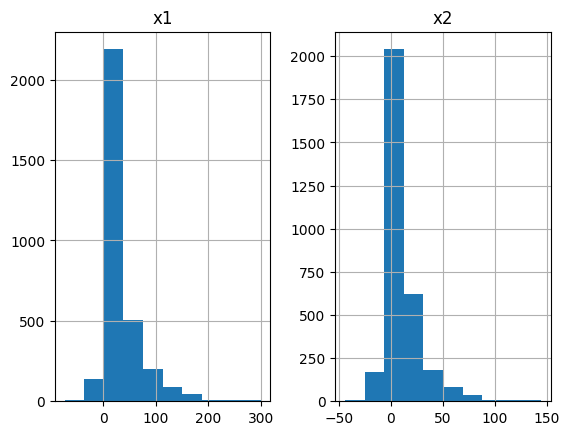

In [89]:
df.hist()

In [90]:
pt = PowerTransformer()
pt.fit(df[["x1", "x2"]])
print(pt.lambdas_)

[0.73622246 0.81018161]


In [91]:
transformed_data = pt.transform(df[["x1", "x2"]])
df[["x1", "x2"]] = transformed_data
df

,Fecha,x1,x2
0,01/01/2006,-0.620684,0.050542
1,01/01/2007,-0.557060,-0.189718
2,01/01/2008,-0.832110,-0.359567
3,01/01/2009,-0.430498,0.132381
4,01/01/2010,-0.607047,-0.299142
...,...,...,...
3282,31/12/2010,-0.303020,0.038191
3283,31/12/2011,-0.336689,NaN
3284,31/12/2012,-0.809947,NaN
3285,31/12/2013,-0.852077,0.004239


array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>]],
      dtype=object)

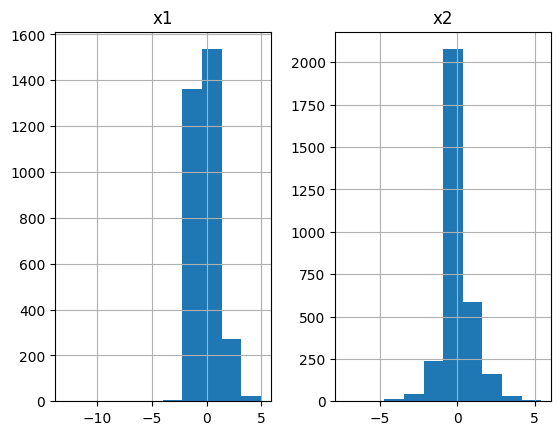

In [92]:
df.hist()

<Axes: >

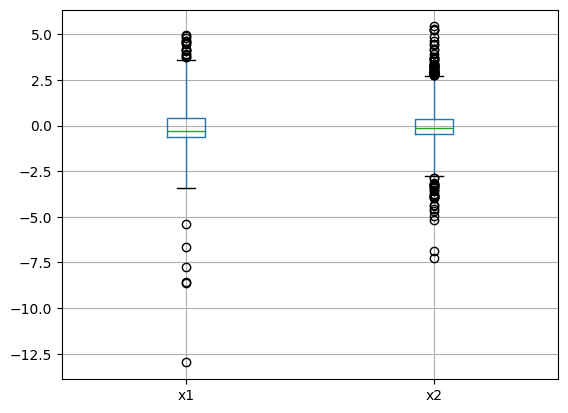

In [93]:
df.boxplot(whis=3)

In [94]:
valores_atipicos_x1 = df["x1"][(df["x1"] - df["x1"].mean()).abs() > 6 * df["x1"].std()]
print(valores_atipicos_x1.shape)
valores_atipicos_x1

(5,)


350     -7.729793
662     -8.554963
794    -12.978954
986     -8.627709
2301    -6.679403
Name: x1, dtype: float64

In [95]:
df.loc[valores_atipicos_x1.index,'x1']=np.nan
df.loc[valores_atipicos_x1.index]

,Fecha,x1,x2
350,04/03/2014,NaN,-0.241037
662,07/02/2011,NaN,0.579581
794,08/05/2008,NaN,-0.130065
986,10/02/2011,NaN,1.003272
2301,22/04/2012,NaN,-0.306392


In [96]:
valores_atipicos_x2 = df["x2"][(df["x2"] - df["x2"].mean()).abs() > 6 * df["x2"].std()]
print(valores_atipicos_x2.shape)
valores_atipicos_x2

(2,)


517    -6.867584
2760   -7.240670
Name: x2, dtype: float64

In [97]:
df.loc[valores_atipicos_x2.index,'x2']=np.nan
df.loc[valores_atipicos_x2.index]

,Fecha,x1,x2
517,05/10/2010,2.265156,NaN
2760,26/07/2012,-0.689721,NaN


In [98]:
df.isna().sum()

Fecha      0
x1        90
x2       129
dtype: int64

In [99]:
df['x1'].kurt(), df['x2'].kurt()

(3.281509448404378, 4.399045738305055)

In [100]:
m1 = df['x1'].mean()
m2 = df['x2'].mean()
m1,m2

(0.013941451984800518, 0.004467464798353641)

In [101]:
df['x1'].fillna(m1, inplace=True)
df['x2'].fillna(m2, inplace=True)
df.isna().sum()

C:\Users\maria\AppData\Local\Temp\ipykernel_29304\320285947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['x1'].fillna(m1, inplace=True)
C:\Users\maria\AppData\Local\Temp\ipykernel_29304\320285947.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

Fecha    0
x1       0
x2       0
dtype: int64

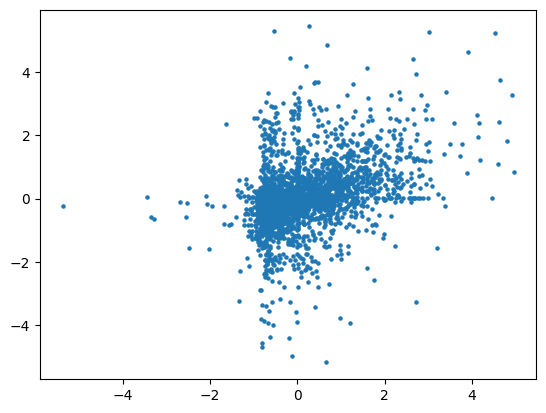

In [102]:
plt.scatter(df["x1"], df["x2"], s=5)

In [106]:
from sklearn.preprocessing import KBinsDiscretizer
k=2#extraccion de caracteristicas en series de tiempo
#rolling
discretizador=KBinsDiscretizer(strategy='kmeans',n_bins=k,encode='ordinal')
df['Kmeans']=discretizador.fit_transform(df[['x1']])
df.head()

C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,Fecha,x1,x2,Kmeans
0,01/01/2006,-0.620684,0.050542,0.0
1,01/01/2007,-0.557060,-0.189718,0.0
2,01/01/2008,-0.832110,-0.359567,0.0
3,01/01/2009,-0.430498,0.132381,0.0
4,01/01/2010,-0.607047,-0.299142,0.0
